# Check the correction of the acceptance matching cut
last edit Sep-22, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

# (1) Load data and apply cuts before and after correction

In [3]:
main_data_path = '/Users/erezcohen/Desktop/data/BAND/'
subdirnames    = ["sidisdvcs_v29July_commit_338982b",
                  "sidisdvcs_v17Sep2022_commit_ea348cc"]
subdirlabels   = ["July-29 (338982b)","Sep-17 (ea348cc)"]
subdircolors   = ['r','b']

In [4]:
Nruns = 1

In [5]:
eepi,eepi_pass_cuts_before_correction,eepi_pass_cuts_after_correction = dict(),dict(),dict()
for subdirname in subdirnames:
    print(subdirname)
    print('-------------')
    eepi[subdirname],_,_ = load_SIDIS_data( Nruns = Nruns,fdebug=0,
                    main_data_path = main_data_path, subdirname = subdirname,
                    do_e_e_pi = True, do_e_e_pi_n = False, do_e_e_pi_FreeP=False,  do_all_vars=True)
    
    eepi_pass_cuts_before_correction[subdirname],_,_,_ = apply_further_selection_cuts_to_data_before_correction(doApply_Mx_cut=False, fdebug=0);
    print(eepi_pass_cuts_before_correction[subdirname].keys())
    print(len(eepi_pass_cuts_before_correction[subdirname]['piplus']))
    
    eepi_pass_cuts_after_correction[subdirname],_,_,_  = apply_further_selection_cuts_to_data(doApply_Mx_cut=False, fdebug=0);
    print()
print('Done.')

sidisdvcs_v29July_commit_338982b
-------------
Done loading files.
Applying selection cuts not previously imposed
(1) Applying cuts to d(e,e'π) data
Apply a π+/π- acceptance matching cut on the in p-theta plane
e_e_pi_after_p_theta_cut.keys(): dict_keys(['piplus', 'piminus'])
e_e_pi_pass_cuts.keys(): dict_keys(['piplus', 'piminus'])
(e,e π+ )
394332 events after original cut (100.0 %)
286985 events after p-theta cut (72.8 %)
286985 events after Mx cut (72.8 %)
286985 events after Kinematical cut (72.8 %)
(e,e π- )
177122 events after original cut (100.0 %)
172302 events after p-theta cut (97.3 %)
172302 events after Mx cut (97.3 %)
172302 events after Kinematical cut (97.3 %)
 
dict_keys(['piplus', 'piminus'])
Done applying event-selection cuts
e_e_pi_pass_cuts.keys(): dict_keys(['piplus', 'piminus'])
dict_keys(['piplus', 'piminus'])
286985
Applying selection cuts not previously imposed
(1) Applying cuts to d(e,e'π) data
Apply a π+/π- acceptance matching cut on the in p-theta plane
(e,

In [6]:
# for subdirname,subdirlabel,subdircolor in zip(subdirnames,subdirlabels,subdircolors):
#     print(subdirlabel)
#     for pi_ch in pi_charge_names:
#         # df = df_dict[pi_ch]
#         df = eepi_pass_cuts[subdirname][pi_ch]        
#         print(len(df),pi_ch,'events with W>%.1f'%np.min(df.W),'GeV/c2')
#     print()

# (2) Extract cross-section before and after correction for each data-set

In [7]:
z_bins   = np.arange(0.3,0.85,0.05)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.2,0.6,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
var,var_label,xlabel = 'xB', "standing proton x", "Bjorken $x$"

In [8]:
data_path = '/Users/erezcohen/Desktop/data/BAND/Results/AcceptanceMatchingCutCorrection/'
prefix    = 'Untagged_SIDIS_ratio_'

In [9]:
for subdirname,subdirlabel,subdircolor in zip(subdirnames,subdirlabels,subdircolors):
    for df_dict,df_dict_label in zip([eepi_pass_cuts_before_correction[subdirname],
                                      eepi_pass_cuts_after_correction[subdirname]],
                                     ['before_correction','after_correction']):
        suffix = subdirname + '_' + df_dict_label
        extract_SIDIS_ratio(df_dict  = df_dict,
                            data_path= data_path,
                            x_var    = var ,
                            x_bins = x_bins,z_bins   = z_bins,z_widths = z_widths,                           
                            prefix   = prefix,
                            suffix   = suffix )
print('Done extracting SIDIS cross-sections')

/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:310: RuntimeWarning: invalid value encountered in double_scalars
  R_err = R * np.sqrt( np.square(Npips_in_bin_err/np.max([Npips_in_bin,cutoff]))
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:309: RuntimeWarning: invalid value encountered in double_scalars
  R     = Npips_in_bin / np.max([Npims_in_bin,cutoff])
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:311: RuntimeWarning: invalid value encountered in double_scalars
  + np.square(Npims_in_bin_err/np.max([Npims_in_bin,cutoff]) ) )


Done extracting SIDIS cross-sections


In [10]:
prefix = 'Untagged_SIDIS_ratio_'
z_arr,z_err_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict()
for subdirname,subdirlabel,subdircolor in zip(subdirnames,subdirlabels,subdircolors):
    for df_dict,df_dict_label in zip([eepi_pass_cuts_before_correction[subdirname],
                                      eepi_pass_cuts_after_correction[subdirname]],
                                     ['before_correction','after_correction']):
        
        suffix = subdirname + '_' + df_dict_label
        print(suffix)
    
        results = load_SIDIS_ratio(prefix = prefix, fdebug=0,
                                   suffix = suffix,                                              
                                   doPlotResults=False, 
                                   data_path=data_path)
        z_arr[suffix],z_err_arr[suffix],R_arr[suffix],R_errup_arr[suffix],R_errdw_arr[suffix] = [],[],[],[],[]
        for key in results.keys():
            z_min = float(key[4:9])
            z_max = float(key[-4:])

            res_x034 = results[key][np.abs(results[key]['$x_B$']-0.34)<0.02]
            R,dR_up,dR_dw = float(res_x034['$R$']),float(res_x034['$\Delta R_{+}$']),float(res_x034['$\Delta R_{+}$'])
            R_arr[suffix].append( R )
            R_errup_arr[suffix].append( dR_up )
            R_errdw_arr[suffix].append( dR_dw )        

            z_arr[suffix].append( (z_max + z_min)/2 )
            z_err_arr[suffix].append( (z_max - z_min)/2 )

print('Done loading SIDIS results and storing cross-section as a function of z for x=0.34.')

sidisdvcs_v29July_commit_338982b_before_correction
sidisdvcs_v29July_commit_338982b_after_correction
sidisdvcs_v17Sep2022_commit_ea348cc_before_correction
sidisdvcs_v17Sep2022_commit_ea348cc_after_correction
Done loading SIDIS results and storing cross-section as a function of z for x=0.34.


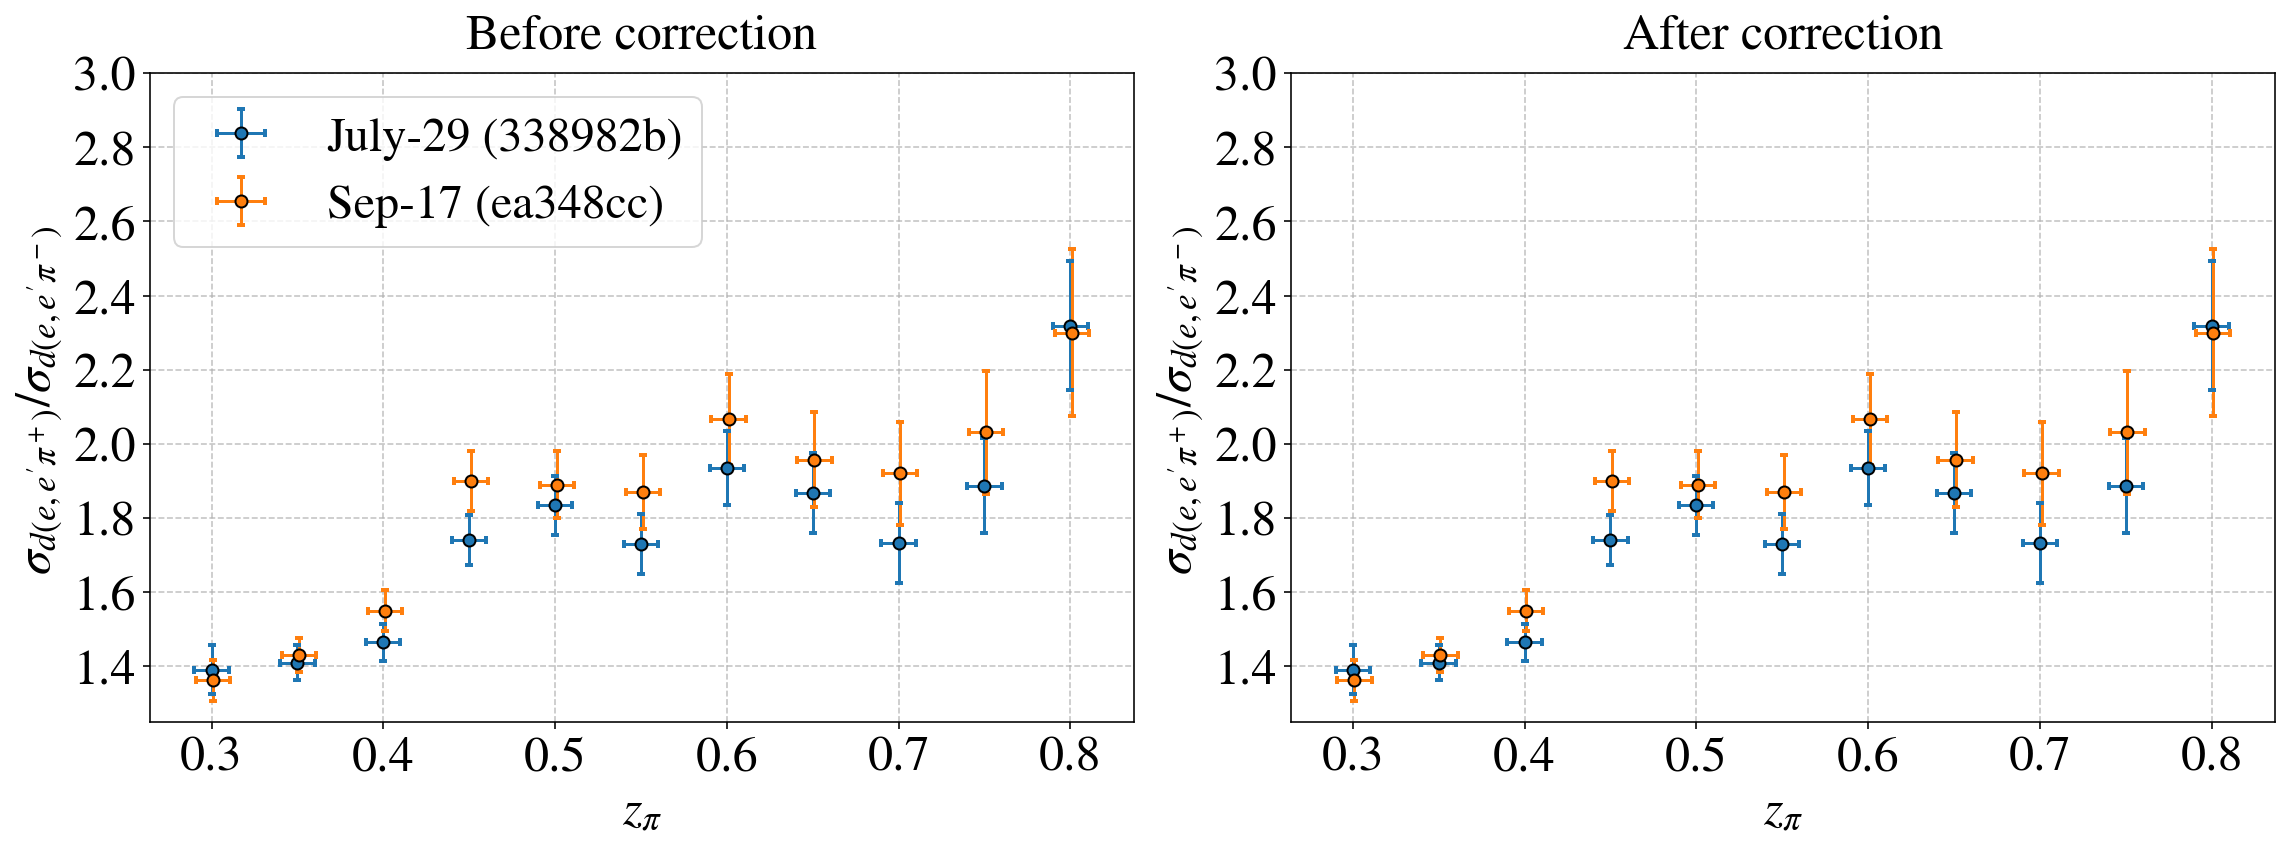

In [11]:
fig = plt.figure(figsize=(16,6), tight_layout=True)

for df_dict,df_dict_label,correction_label,correction_idx in zip([eepi_pass_cuts_before_correction[subdirname],                                      
                                                                  eepi_pass_cuts_after_correction[subdirname]],
                                                                 ['before_correction','after_correction'],
                                                                 ['Before correction','After correction'],
                                                                 [1,2]):
    ax = fig.add_subplot(1,2,correction_idx)
    
    for subdirname,subdirlabel,subdircolor,sufidx in zip(subdirnames,subdirlabels,subdircolors,[0,1]):
        suffix = subdirname + '_' + df_dict_label

        plt.errorbar(x=np.array(z_arr[suffix])+sufidx*0.001, xerr=z_err_arr[suffix],
                     y=R_arr[suffix], yerr=(R_errup_arr[suffix],R_errdw_arr[suffix]),
                     marker='o',markeredgecolor='k',linestyle='None',
                     label=subdirlabel, capthick=2, capsize=2)

    set_axes(ax,'$z_\\pi$',             
         "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
         title = correction_label,             
         do_add_grid=True, do_add_legend=False, ylim=(1.25,3))

    if correction_idx==1: ax.legend(loc='upper left',fontsize=24);

# (3) All events - with and without the correction 
And compare to data from July-28 and Aug-31

In [13]:
Nruns = -1
eepi,eepi_pass_cuts_before_correction,eepi_pass_cuts_after_correction = dict(),dict(),dict()
subdirname = 'sidisdvcs_v17Sep2022_commit_ea348cc'
print(subdirname)
load_SIDIS_data( Nruns = Nruns,fdebug=0,
                main_data_path = main_data_path, subdirname = subdirname,
                do_e_e_pi = True, do_e_e_pi_n = False, do_e_e_pi_FreeP=False,  do_all_vars=True)
    
eepi_pass_cuts_before_correction[subdirname],_,_,_ = apply_further_selection_cuts_to_data_before_correction(doApply_Mx_cut=False, fdebug=0);
eepi_pass_cuts_after_correction[subdirname],_,_,_  = apply_further_selection_cuts_to_data(doApply_Mx_cut=False, fdebug=0);

print('Done.')

sidisdvcs_v17Sep2022_commit_ea348cc
Done loading files.
Applying selection cuts not previously imposed
(1) Applying cuts to d(e,e'π) data
Apply a π+/π- acceptance matching cut on the in p-theta plane
e_e_pi_after_p_theta_cut.keys(): dict_keys(['piplus', 'piminus'])
e_e_pi_pass_cuts.keys(): dict_keys(['piplus', 'piminus'])
(e,e π+ )
25762859 events after original cut (100.0 %)
25761433 events after p-theta cut (100.0 %)
25761433 events after Mx cut (100.0 %)
25761433 events after Kinematical cut (100.0 %)
(e,e π- )
10723162 events after original cut (100.0 %)
10723133 events after p-theta cut (100.0 %)
10723133 events after Mx cut (100.0 %)
10723133 events after Kinematical cut (100.0 %)
 
dict_keys(['piplus', 'piminus'])
Done applying event-selection cuts
e_e_pi_pass_cuts.keys(): dict_keys(['piplus', 'piminus'])
Applying selection cuts not previously imposed
(1) Applying cuts to d(e,e'π) data
Apply a π+/π- acceptance matching cut on the in p-theta plane
(e,e π+ )
25762859 events after 

In [15]:
for df_dict,df_dict_label in zip([eepi_pass_cuts_before_correction[subdirname],
                                      eepi_pass_cuts_after_correction[subdirname]],
                                     ['before_correction','after_correction']):
    suffix = subdirname + '_' + df_dict_label
    extract_SIDIS_ratio(df_dict  = df_dict,
                            data_path= data_path,
                            x_var    = var ,
                            x_bins = x_bins,z_bins   = z_bins,z_widths = z_widths,                           
                            prefix   = prefix,
                            suffix   = suffix )
print('Done extracting SIDIS cross-sections')

/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:309: RuntimeWarning: invalid value encountered in double_scalars
  R     = Npips_in_bin / np.max([Npims_in_bin,cutoff])
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:310: RuntimeWarning: invalid value encountered in double_scalars
  R_err = R * np.sqrt( np.square(Npips_in_bin_err/np.max([Npips_in_bin,cutoff]))
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:311: RuntimeWarning: invalid value encountered in double_scalars
  + np.square(Npims_in_bin_err/np.max([Npims_in_bin,cutoff]) ) )


Done extracting SIDIS cross-sections


In [16]:
prefix = 'Untagged_SIDIS_ratio_'
z_arr,z_err_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict()
for df_dict,df_dict_label in zip([eepi_pass_cuts_before_correction[subdirname],
                                      eepi_pass_cuts_after_correction[subdirname]],
                                     ['before_correction','after_correction']):
        
    suffix = subdirname + '_' + df_dict_label
    results = load_SIDIS_ratio(prefix = prefix, fdebug=0,
                               suffix = suffix,                                              
                               doPlotResults=False, 
                               data_path=data_path)
    z_arr[suffix],z_err_arr[suffix],R_arr[suffix],R_errup_arr[suffix],R_errdw_arr[suffix] = [],[],[],[],[]
    for key in results.keys():
        z_min = float(key[4:9])
        z_max = float(key[-4:])

        res_x034 = results[key][np.abs(results[key]['$x_B$']-0.34)<0.02]
        R,dR_up,dR_dw = float(res_x034['$R$']),float(res_x034['$\Delta R_{+}$']),float(res_x034['$\Delta R_{+}$'])
        R_arr[suffix].append( R )
        R_errup_arr[suffix].append( dR_up )
        R_errdw_arr[suffix].append( dR_dw )        

        z_arr[suffix].append( (z_max + z_min)/2 )
        z_err_arr[suffix].append( (z_max - z_min)/2 )

print('Done loading SIDIS results and storing cross-section as a function of z for x=0.34.')

Done loading SIDIS results and storing cross-section as a function of z for x=0.34.


<AxesSubplot:xlabel='$z_\\pi$', ylabel="$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ">

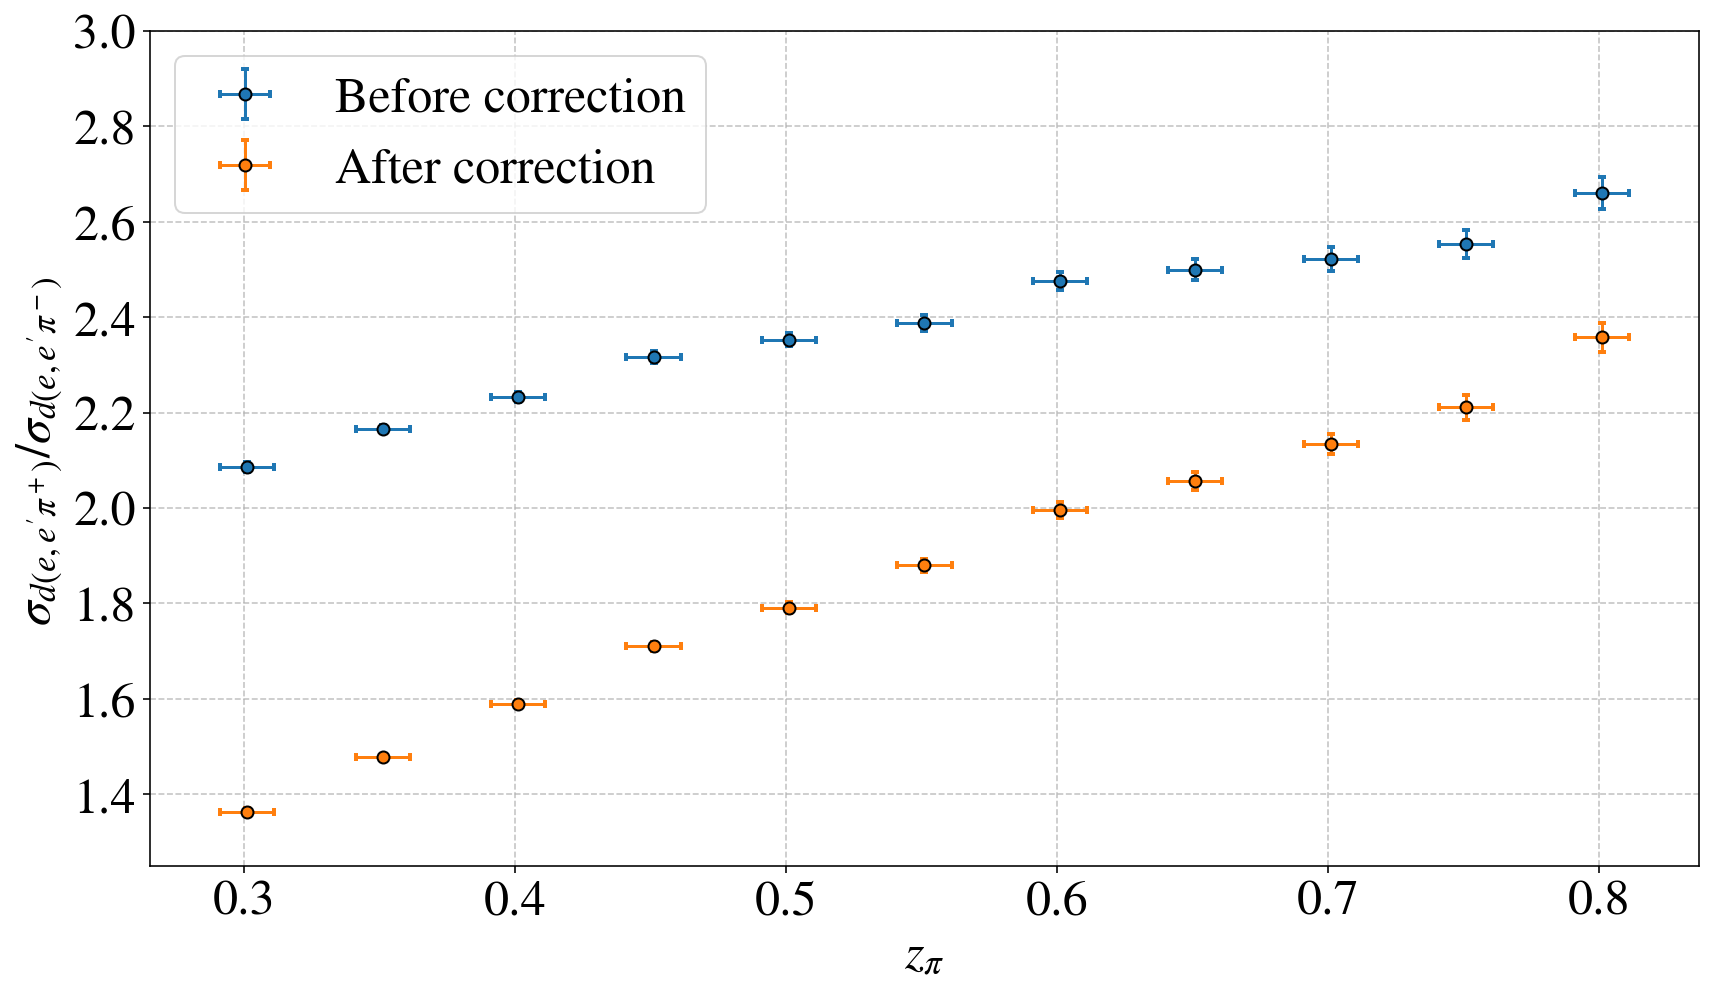

In [18]:
fig = plt.figure(figsize=(12,7), tight_layout=True)
ax = fig.add_subplot(1,1,1)
for df_dict_label,correction_label,correction_idx in zip(['before_correction','after_correction'],
                                                                 ['Before correction','After correction'],
                                                                 [1,2]):
    suffix = subdirname + '_' + df_dict_label

    plt.errorbar(x=np.array(z_arr[suffix])+sufidx*0.001, xerr=z_err_arr[suffix],
                     y=R_arr[suffix], yerr=(R_errup_arr[suffix],R_errdw_arr[suffix]),
                     marker='o',markeredgecolor='k',linestyle='None',
                     label=correction_label, capthick=2, capsize=2)

set_axes(ax,'$z_\\pi$',             
         "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
         do_add_grid=True, do_add_legend=True, ylim=(1.25,3))


## Add results from July-28 and Aug-31

In [20]:
prefix = 'Untagged_SIDIS_ratio_'
SIDIS_res = dict()
SIDIS_res['Jul-28'] = load_SIDIS_ratio(prefix = prefix, doPlotResults=False,
                                 data_path='/Users/erezcohen/Desktop/data/BAND/tmp/Results_July28_2022/')

SIDIS_res['Aug-31'] = load_SIDIS_ratio(prefix = prefix, doPlotResults=False,
                                 data_path='/Users/erezcohen/Desktop/data/BAND/tmp/Results_Aug31_2022/')

print('Done loading results from Jul-28 and Aug-31.')

Done loading results from Jul-28 and Aug-31.


In [21]:
for results_label,Xsec_label in zip(['Jul-28','Aug-31'],['Results Jul-28','Results Aug-31']):
    results = SIDIS_res[results_label]
    z_arr[Xsec_label],z_err_arr[Xsec_label],R_arr[Xsec_label],R_errup_arr[Xsec_label],R_errdw_arr[Xsec_label] = [],[],[],[],[]
    for key in results.keys():
        z_min = float(key[4:9])
        z_max = float(key[-4:])

        res_x034 = results[key][np.abs(results[key]['$x_B$']-0.34)<0.02]
        R,dR_up,dR_dw = float(res_x034['$R$']),float(res_x034['$\Delta R_{+}$']),float(res_x034['$\Delta R_{+}$'])
        
        R_arr[Xsec_label].append( R )
        R_errup_arr[Xsec_label].append( dR_up )
        R_errdw_arr[Xsec_label].append( dR_dw )        

        z_arr[Xsec_label].append( (z_max + z_min)/2 )
        z_err_arr[Xsec_label].append( (z_max - z_min)/2 )
        
print('Done.')

Done.


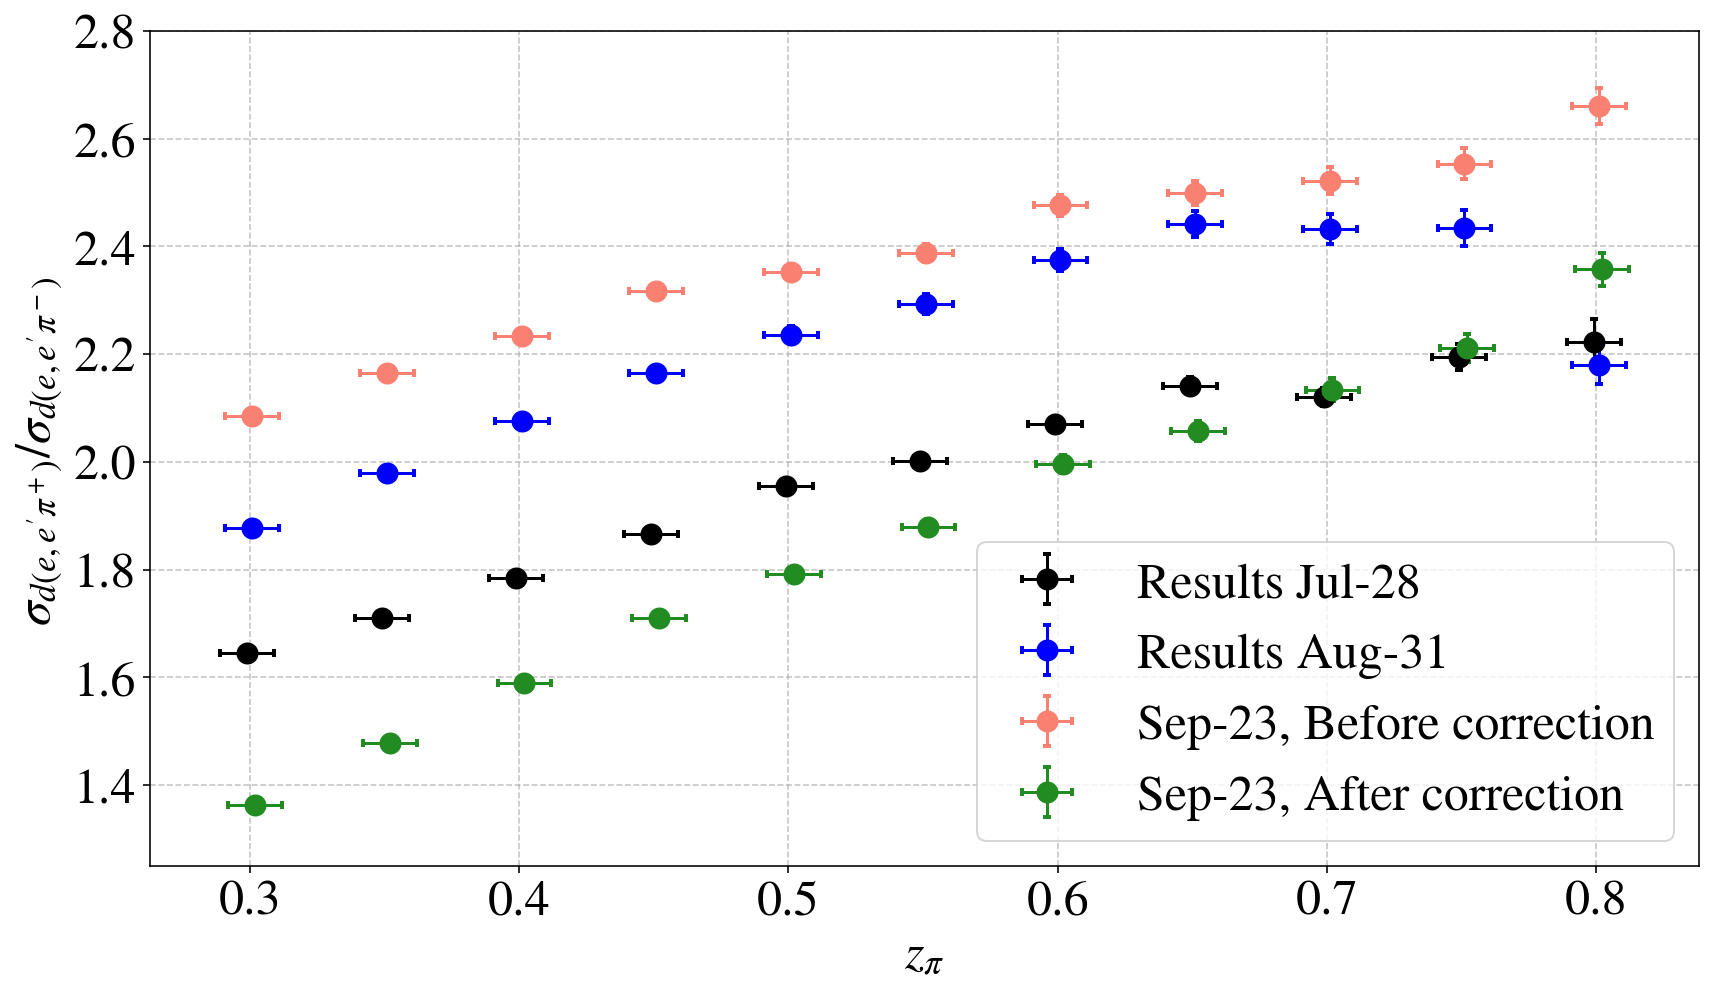

In [42]:
fig = plt.figure(figsize=(12,7), tight_layout=True)
ax = fig.add_subplot(1,1,1)

for Xsec_label,res_idx,color in zip(['Results Jul-28','Results Aug-31'],
                                              [-1,1],
                                              ['k','b']):
    
    plt.errorbar(x=np.array(z_arr[Xsec_label])+res_idx*0.001, xerr=z_err_arr[Xsec_label],                     
                 y=R_arr[Xsec_label], yerr=(R_errup_arr[Xsec_label],R_errdw_arr[Xsec_label]),
                 markersize=10,                     
                 marker='o',
                 color=color,
                 markeredgecolor=color,
                 markerfacecolor=color,
                 linestyle='None',                     
                 label=Xsec_label, capthick=2, capsize=2)


for df_dict_label,correction_label,correction_idx,color in zip(['before_correction','after_correction'],                                                                 
                                                         ['Sep-23, Before correction','Sep-23, After correction'],                                                         
                                                         [1,2],['salmon','forestgreen']):
    suffix = subdirname + '_' + df_dict_label
    plt.errorbar(x=np.array(z_arr[suffix])+correction_idx*0.001, xerr=z_err_arr[suffix],
                     y=R_arr[suffix], yerr=(R_errup_arr[suffix],R_errdw_arr[suffix]),
                 markersize=10,
                 markerfacecolor=color,
                 color=color,                 
                 marker='o',
                 markeredgecolor=color,
                 linestyle='None',
                 # linecolor=color,
                     label=correction_label, capthick=2, capsize=2)

    
    
set_axes(ax,'$z_\\pi$',             
         "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
         do_add_grid=True, do_add_legend=True, ylim=(1.25,2.8));

